In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "./data/"
cities_csv = "cities_cleaned.csv"
providers_csv ="providers_cleaned.csv"
stations_csv ="stations_cleaned.csv"
ticket_data_csv ="ticket_data_cleaned.csv"

In [3]:
read_file = lambda p,f : pd.read_csv(p+f, sep=";",on_bad_lines='warn', encoding="utf8")
cities_df = read_file(path,cities_csv) 
providers_df = read_file(path,providers_csv)  
stations_df = read_file(path,stations_csv)  
ticket_data_df = read_file(path,ticket_data_csv)  
ticket_data_df["duration"] = pd.to_datetime(ticket_data_df["arrival_ts"]) - pd.to_datetime(ticket_data_df["departure_ts"])

## Data analysis

In [4]:
ticket_data_df.price_in_euros.describe()

count    74168.000000
mean        43.827111
std         37.393254
min          3.000000
25%         19.000000
50%         33.500000
75%         52.500000
max        385.500000
Name: price_in_euros, dtype: float64

We see that the average price of a ticket is 43.82€, the minimum is 3.00€, the maximum is 385.5€ and 75% of the tickets have a price less than 52.5€.

In [5]:
price_df = pd.merge(ticket_data_df,cities_df[["id","city","country"]], 
                    left_on="o_city", right_on="id", suffixes = (None,"_y"))
#price_df.drop(columns=["o_city","id_x","id_y"], axis=1,inplace=True)
#price_df.rename(columns={"city" : "o_city", "country":"o_country"})
price_df.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_euros,search_ts,middle_stations,other_companies,o_city,d_city,duration,id_y,city,country
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,45.5,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,0 days 06:10:00,611,Orléans,France
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,14.5,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,0 days 17:50:00,611,Orléans,France
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,74.0,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,1 days 07:57:00,611,Orléans,France
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,135.0,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,0 days 21:35:00,611,Orléans,France
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,77.1,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,0 days 21:46:00,611,Orléans,France


In [6]:
#merge to get the name of origin city
price_df = pd.merge(ticket_data_df,cities_df[["id","city","country"]], left_on="o_city",right_on="id",
                    suffixes=(None,"_c"),how="left")
price_df.drop(["id_c"], axis=1,inplace=True)
price_df.rename(columns={"o_city":"o_city_id","city" : "o_city_name", "country":"o_country"},inplace=True)
print(price_df.columns)

Index(['id', 'company', 'o_station', 'd_station', 'departure_ts', 'arrival_ts',
       'price_in_euros', 'search_ts', 'middle_stations', 'other_companies',
       'o_city_id', 'd_city', 'duration', 'o_city_name', 'o_country'],
      dtype='object')


In [7]:
#merge to get the name of departure city
price_df = pd.merge(price_df,cities_df[["id","city","country"]], left_on="d_city", right_on="id",
                   suffixes=(None,"_c2"),how="left")
price_df.drop(["id_c2"], axis=1,inplace=True)
price_df.rename(columns={"d_city":"d_city_id","city" : "d_city_name", "country":"d_country"}
                ,inplace=True)
print(list(price_df.columns))

['id', 'company', 'o_station', 'd_station', 'departure_ts', 'arrival_ts', 'price_in_euros', 'search_ts', 'middle_stations', 'other_companies', 'o_city_id', 'd_city_id', 'duration', 'o_city_name', 'o_country', 'd_city_name', 'd_country']


In [8]:
#merge to get the name of origin station
price_df = pd.merge(price_df,stations_df[["id","unique_name"]], left_on="o_station", right_on="id",
                   suffixes=(None,"_s"),how="left")
price_df.drop(["id_s"], axis=1,inplace=True)
price_df.rename(columns={"o_station" : "o_station_id", "unique_name" : "o_station_name"},inplace=True)
print(list(price_df.columns))

['id', 'company', 'o_station_id', 'd_station', 'departure_ts', 'arrival_ts', 'price_in_euros', 'search_ts', 'middle_stations', 'other_companies', 'o_city_id', 'd_city_id', 'duration', 'o_city_name', 'o_country', 'd_city_name', 'd_country', 'o_station_name']


In [9]:
#merge to get the name of departure station            
price_df = pd.merge(price_df,stations_df[["id","unique_name"]], 
                    left_on="d_station", right_on="id",suffixes=(None,"_s2"),how="left")
price_df.drop(["id_s2"], axis=1,inplace=True)
price_df.rename(columns={"d_station" : "d_station_id", "unique_name" : "d_station_name"},inplace=True)
print(list(price_df.columns))

['id', 'company', 'o_station_id', 'd_station_id', 'departure_ts', 'arrival_ts', 'price_in_euros', 'search_ts', 'middle_stations', 'other_companies', 'o_city_id', 'd_city_id', 'duration', 'o_city_name', 'o_country', 'd_city_name', 'd_country', 'o_station_name', 'd_station_name']


In [10]:
#merge to get the name of the company station            
price_df = pd.merge(price_df,providers_df, left_on="company", right_on="id",
                   suffixes=(None,"_p"))
price_df.drop(["id_p","company"], axis=1,inplace=True)
print(list(price_df.columns))

['id', 'o_station_id', 'd_station_id', 'departure_ts', 'arrival_ts', 'price_in_euros', 'search_ts', 'middle_stations', 'other_companies', 'o_city_id', 'd_city_id', 'duration', 'o_city_name', 'o_country', 'd_city_name', 'd_country', 'o_station_name', 'd_station_name', 'company_id', 'provider_id', 'name', 'fullname', 'has_wifi', 'has_plug', 'has_adjustable_seats', 'has_bicycle', 'transport_type']


In [11]:
price_df[price_df.transport_type=="carpooling"]

,id,o_station_id,d_station_id,departure_ts,arrival_ts,price_in_euros,search_ts,middle_stations,other_companies,o_city_id,...,d_station_name,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,6795025,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,45.5,2017-10-01 00:13:31.327+00,NaN,NaN,611,...,NaN,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
1,6795030,NaN,NaN,2017-10-06 05:30:00+00,2017-10-06 08:30:00+00,18.0,2017-10-01 01:03:18.948+00,NaN,NaN,628,...,NaN,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
2,6795031,NaN,NaN,2017-10-06 07:00:42+00,2017-10-06 09:30:42+00,21.5,2017-10-01 01:03:18.948+00,NaN,NaN,628,...,NaN,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
3,6795032,NaN,NaN,2017-10-06 07:10:00+00,2017-10-06 09:40:00+00,17.0,2017-10-01 01:03:18.948+00,NaN,NaN,628,...,NaN,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
4,6795033,NaN,NaN,2017-10-06 10:00:00+00,2017-10-06 12:50:00+00,17.0,2017-10-01 01:03:18.948+00,NaN,NaN,628,...,NaN,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41436,6869165,NaN,NaN,2017-10-27 18:30:00+00,2017-10-27 22:50:00+00,29.0,2017-10-19 10:35:31.269+00,NaN,NaN,628,...,NaN,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
41437,6869166,NaN,NaN,2017-10-27 18:30:00+00,2017-10-27 23:10:00+00,30.0,2017-10-19 10:35:31.269+00,NaN,NaN,628,...,NaN,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
41438,6869167,NaN,NaN,2017-10-27 19:10:00+00,2017-10-27 23:00:00+00,26.5,2017-10-19 10:35:31.269+00,NaN,NaN,628,...,NaN,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
41439,6869168,NaN,NaN,2017-10-27 21:20:00+00,2017-10-28 01:10:00+00,29.0,2017-10-19 10:35:31.269+00,NaN,NaN,628,...,NaN,11,NaN,bbc,Blablacar,False,False,False,False,carpooling


In [12]:
price_df.o_station_id.fillna(0,inplace=True)
price_df.d_station_id.fillna(0,inplace=True)
price_df.head()

,id,o_station_id,d_station_id,departure_ts,arrival_ts,price_in_euros,search_ts,middle_stations,other_companies,o_city_id,...,d_station_name,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,6795025,0.0,0.0,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,45.5,2017-10-01 00:13:31.327+00,NaN,NaN,611,...,NaN,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
1,6795030,0.0,0.0,2017-10-06 05:30:00+00,2017-10-06 08:30:00+00,18.0,2017-10-01 01:03:18.948+00,NaN,NaN,628,...,NaN,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
2,6795031,0.0,0.0,2017-10-06 07:00:42+00,2017-10-06 09:30:42+00,21.5,2017-10-01 01:03:18.948+00,NaN,NaN,628,...,NaN,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
3,6795032,0.0,0.0,2017-10-06 07:10:00+00,2017-10-06 09:40:00+00,17.0,2017-10-01 01:03:18.948+00,NaN,NaN,628,...,NaN,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
4,6795033,0.0,0.0,2017-10-06 10:00:00+00,2017-10-06 12:50:00+00,17.0,2017-10-01 01:03:18.948+00,NaN,NaN,628,...,NaN,11,NaN,bbc,Blablacar,False,False,False,False,carpooling


In [13]:
np.unique(price_df.transport_type)

array(['bus', 'carpooling', 'train'], dtype=object)

### min, max, mean of price with merged data

In [14]:
price_df.price_in_euros.describe()

count    74168.000000
mean        43.827111
std         37.393254
min          3.000000
25%         19.000000
50%         33.500000
75%         52.500000
max        385.500000
Name: price_in_euros, dtype: float64

We haven't loose data. With inner join in place of left join we would have lost the data join key were null most notacibly the data about carpooling as they don't have departure and arrival station. For this case the average price of a ticket is 64.60€, the minimum is 4.90€, the maximum is 385.5€ and 75% of the tickets have a price less than 86.7€. Hence carpooling seems to decrease cost even if we need to compare cost of same trajet with the different transport type

In [15]:
#merge to get the name of departure station            
price_df_wto_carpooling = pd.merge(ticket_data_df,stations_df[["id","unique_name"]], 
                    left_on="d_station", right_on="id",suffixes=(None,"_s2"))
price_df_wto_carpooling.drop(["id_s2"], axis=1,inplace=True)
price_df_wto_carpooling.rename(columns={"d_station" : "d_station_id", "unique_name" : "d_station_name"},inplace=True)
price_df_wto_carpooling = pd.merge(price_df_wto_carpooling,stations_df[["id","unique_name"]], 
                    left_on="o_station", right_on="id",suffixes=(None,"_s2"))
price_df_wto_carpooling.drop(["id_s2"], axis=1,inplace=True)
price_df_wto_carpooling.rename(columns={"o_station" : "o_station_id", "unique_name" : "o_station_name"},inplace=True)

price_df_wto_carpooling.price_in_euros.describe()

count    32727.000000
mean        64.600656
std         45.944106
min          4.900000
25%         31.000000
50%         49.500000
75%         86.700000
max        385.500000
Name: price_in_euros, dtype: float64

#### Stat of price per ride station to station

In [16]:
price_df[["o_station_name","d_station_name","price_in_euros"]].groupby(["o_station_name","d_station_name"])["price_in_euros"].describe()

count  \
o_station_name                             d_station_name                                              
Aeroport Cdg2 Tgv Roissy                   Cannes                                                9.0   
Agen                                       Gare SNCF Dijon Ville                                 2.0   
                                           Gare de Marseille Saint-Charles                      10.0   
                                           Gare routière de Toulouse                             2.0   
Agen (Exit A62)                            Gare Routière Internationale de Paris-Gallieni ...    3.0   
...                                                                                              ...   
Zurich central station (Sihlquai car park) Gare de Liège-Guillemins                              3.0   
                                           Gare routière de Strasbourg                           5.0   
parking Velodrome                          Gare Bruxelles-Midi                                   1.0   
                                           Gare de Bruxelles-Nord                                1.0   
                                           Gare routière de Berlin                               4.0   

                                                                                                     mean  \
o_station_name                             d_station_name                                                   
Aeroport Cdg2 Tgv Roissy                   Cannes                                               90.222222   
Agen                                       Gare SNCF Dijon Ville                               117.550000   
                                           Gare de Marseille Saint-Charles                      65.100000   
                                           Gare routière de Toulouse                            24.200000   
Agen (Exit A62)                            Gare Routière Internationale de Paris-Gallieni ...   26.666667   
...                                                                                                   ...   
Zurich central station (Sihlquai car park) Gare de Liège-Guillemins                             41.900000   
                                           Gare routière de Strasbourg                          15.900000   
parking Velodrome                          Gare Bruxelles-Midi                                  40.900000   
                                           Gare de Bruxelles-Nord                               39.800000   
                                           Gare routière de Berlin                              46.925000   

                                                                                                     std  \
o_station_name                             d_station_name                                                  
Aeroport Cdg2 Tgv Roissy                   Cannes                                              20.873295   
Agen                                       Gare SNCF Dijon Ville                               26.799347   
                                           Gare de Marseille Saint-Charles                     15.114085   
                                           Gare routière de Toulouse                            0.000000   
Agen (Exit A62)                            Gare Routière Internationale de Paris-Gallieni ...   1.154701   
...                                                                                                  ...   
Zurich central station (Sihlquai car park) Gare de Liège-Guillemins                             0.000000   
                                           Gare routière de Strasbourg                          1.343503   
parking Velodrome                          Gare Bruxelles-Midi                                       NaN   
                                           Gare de Bruxelles-Nord                                    NaN   
                            

In the case of ride with great many occurence duch as Agen-Gare de Marseille Saint-Charles, the price has a standard deviation of 26€ wich is huge for the price. A price comparator is indeed usefull.

We can visualise these data:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1500x900 with 0 Axes>

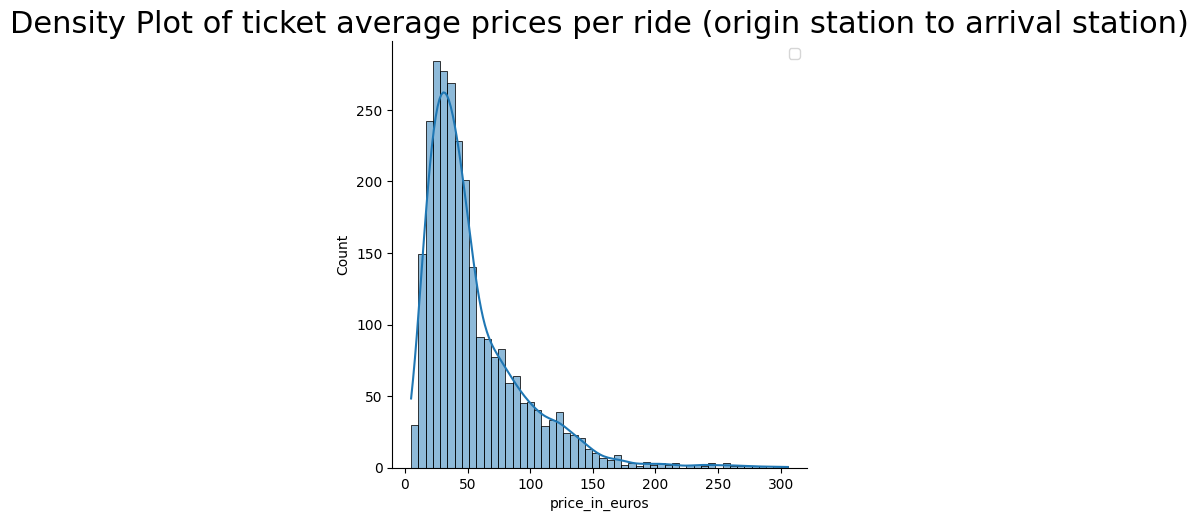

In [17]:
mean_price_per_ride = price_df[["o_station_name","d_station_name","price_in_euros"]].groupby(["o_station_name","d_station_name"])["price_in_euros"].mean()
plt.figure(figsize=(15,9))
sns.displot(mean_price_per_ride,kde= True)

plt.title('Density Plot of ticket average prices per ride (origin station to arrival station)', fontsize=22)
plt.legend()
plt.show()

#### Stat of price per ride city to city

In [18]:
price_per_ride_city = price_df[["o_city_name","d_city_name","price_in_euros"]].groupby(["o_city_name","d_city_name"])["price_in_euros"]
price_per_ride_city.describe()

count        mean        std    min      25%  \
o_city_name d_city_name                                                        
Agde        Amsterdam             5.0  203.200000  13.700365  186.0  193.000   
Agen        Dijon                 2.0  117.550000  26.799347   98.6  108.075   
            Marseille            30.0   40.426667  20.763013   20.0   21.000   
            Marseille Aéroport    6.0   38.333333   1.402379   37.0   37.250   
            Paris                 4.0   27.975000   2.781337   26.0   26.000   
...                               ...         ...        ...    ...      ...   
Zürich      Liège                 9.0   40.966667   0.700000   40.5   40.500   
            Strasbourg            5.0   15.900000   1.343503   14.0   15.900   
Épinal      Paris                16.0   27.968750   5.389709   18.0   27.500   
            Strasbourg            4.0   18.475000   9.214255   11.0   11.000   
Évreux      Bernay                8.0   10.462500   4.952038    5.0    5.000   

                                   50%      75%    max  
o_city_name d_city_name                                 
Agde        Amsterdam           206.00  211.000  220.0  
Agen        Dijon               117.55  127.025  136.5  
            Marseille            34.00   50.400   89.2  
            Marseille Aéroport   38.00   39.125   40.5  
            Paris                27.00   28.975   31.9  
...                                ...      ...    ...  
Zürich      Liège                40.50   41.900   41.9  
            Strasbourg           15.90   15.900   17.8  
Épinal      Paris                30.00   30.000   35.0  
            Strasbourg           16.50   23.975   29.9  
Évreux      Bernay               11.60   13.375   18.0  

[1437 rows x 8 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1500x900 with 0 Axes>

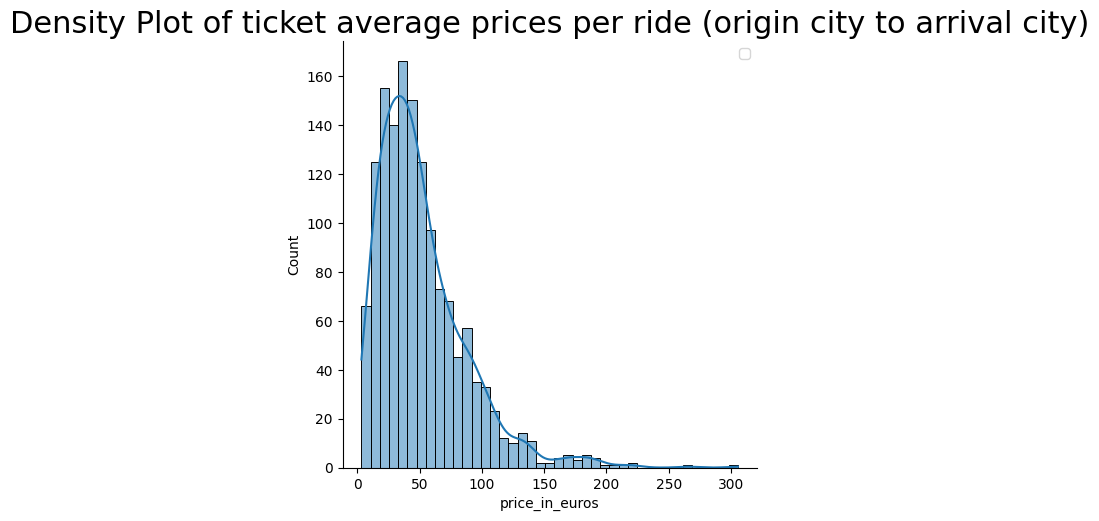

In [19]:
price_per_ride_city_mean = price_per_ride_city.mean()
plt.figure(figsize=(15,9))
sns.displot(price_per_ride_city_mean,kde= True)

plt.title('Density Plot of ticket average prices per ride (origin city to arrival city)', fontsize=22)
plt.legend()
plt.show()

Duration per ride

In [20]:
def sec_to_date(s):
    days, seconds = divmod(s, 86400)
    hours, seconds = divmod(seconds, 3600)
    minutes, seconds = divmod(seconds, 60)
    if days !=0:
        return str(int(days))+" days "+str(int(hours))+" hours "+ str(int(minutes)) + " min " + str(int(seconds)) +" sec"
    else:
        if hours !=0:
            return str(int(hours))+" hours "+ str(int(minutes)) + " min " + str(int(seconds)) +" sec" 
        else : 
            if minutes!=0: return str(int(minutes)) + " min " + str(int(seconds)) +" sec"
            else: return str(int(seconds)) +" sec"

In [21]:
print("The minimal duration is",sec_to_date(ticket_data_df.duration.dt.total_seconds().min()))
print("The maximal duration is",sec_to_date(ticket_data_df.duration.dt.total_seconds().max()))
print("The average duration is",sec_to_date(ticket_data_df.duration.dt.total_seconds().mean()))

The minimal duration is 20 min 0 sec
The maximal duration is 20 days 12 hours 51 min 0 sec
The average duration is 7 hours 4 min 37 sec


We observe that the average duration is 7 hours, 4 min and 37 sec and the minimal is 20 minutes so we have mostly long ride for the ride we know the departure and arrival.

### Average price per transport

In [22]:
price_df.groupby("transport_type")["transport_type"].count()

transport_type
bus           13798
carpooling    41441
train         18929
Name: transport_type, dtype: int64

In [23]:
price_df.groupby("transport_type")["price_in_euros"].mean()

transport_type
bus           36.524480
carpooling    27.421719
train         85.066348
Name: price_in_euros, dtype: float64

<AxesSubplot: xlabel='transport_type', ylabel='price_in_euros'>

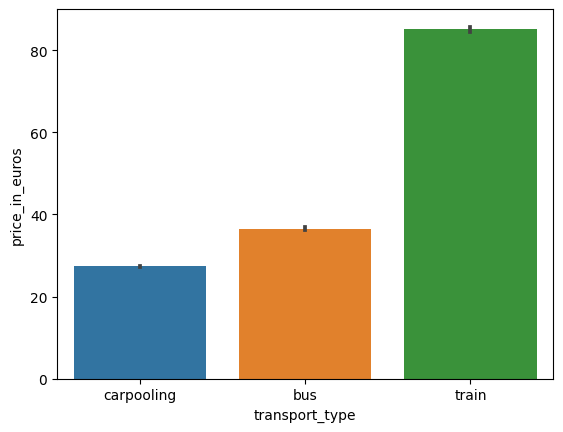

In [24]:
sns.barplot(x=price_df["transport_type"], y=price_df["price_in_euros"])

## Difference in average price and duration according to the train, bus and carpooling according to the distance of the trip

In [25]:
def haversine_distance(lat1, lon1, lat2, lon2):# Radius of the Earth in kilometers
    radius = 6371
    # Convert degrees to radians
    lat1_rad,lon1_rad = np.radians(lat1),np.radians(lon1)
    lat2_rad, lon2_rad = np.radians(lat2),np.radians(lon2)

    # Haversine formula
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = np.sin(dlat/2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

    return np.round(radius * c,2)

In [26]:
price_df.columns

Index(['id', 'o_station_id', 'd_station_id', 'departure_ts', 'arrival_ts',
       'price_in_euros', 'search_ts', 'middle_stations', 'other_companies',
       'o_city_id', 'd_city_id', 'duration', 'o_city_name', 'o_country',
       'd_city_name', 'd_country', 'o_station_name', 'd_station_name',
       'company_id', 'provider_id', 'name', 'fullname', 'has_wifi', 'has_plug',
       'has_adjustable_seats', 'has_bicycle', 'transport_type'],
      dtype='object')

In [27]:
time_type_price = price_df[['transport_type','price_in_euros', 'duration',
                           'o_city_id','d_city_id','o_country','d_country'] ]
#merge to get the latitute and longitude departure city
time_type_price = pd.merge(time_type_price,cities_df[["id","latitude","longitude"]], 
                           left_on="d_city_id", right_on="id",suffixes=(None,"_d"))
time_type_price.drop(["id"], axis=1,inplace=True)
time_type_price.rename(columns={"latitude":"d_latitude","longitude" : "d_longitude"} ,inplace=True)

#merge to get the latitute and longitude city
time_type_price = pd.merge(time_type_price,cities_df[["id","latitude","longitude"]], 
                           left_on="o_city_id", right_on="id", suffixes=(None,"_o"))
time_type_price.drop(["id"], axis=1,inplace=True)
time_type_price.rename(columns={"latitude":"o_latitude","longitude" : "o_longitude"} ,inplace=True)
time_type_price.head()

,transport_type,price_in_euros,duration,o_city_id,d_city_id,o_country,d_country,d_latitude,d_longitude,o_latitude,o_longitude
0,carpooling,45.5,0 days 06:10:00,611,542,France,France,43.604452,3.918318,47.907018,1.90627
1,bus,14.5,0 days 17:50:00,611,542,France,France,43.604452,3.918318,47.907018,1.90627
2,train,74.0,1 days 07:57:00,611,542,France,France,43.604452,3.918318,47.907018,1.90627
3,train,135.0,0 days 21:35:00,611,542,France,France,43.604452,3.918318,47.907018,1.90627
4,train,77.1,0 days 21:46:00,611,542,France,France,43.604452,3.918318,47.907018,1.90627


In [28]:
time_type_price["distance_in_kms"] = haversine_distance(time_type_price["d_latitude"], time_type_price["d_longitude"], 
                                                    time_type_price["o_latitude"],time_type_price["o_longitude"])

In [29]:
bins = [0,200, 800, 2000, np.inf]
names = ["0-200", "201-800", "800-2000", "2000"]
time_type_price['distance_range'] = pd.cut(time_type_price['distance_in_kms'], bins, labels=names)
time_type_price.head()

,transport_type,price_in_euros,duration,o_city_id,d_city_id,o_country,d_country,d_latitude,d_longitude,o_latitude,o_longitude,distance_in_kms,distance_range
0,carpooling,45.5,0 days 06:10:00,611,542,France,France,43.604452,3.918318,47.907018,1.90627,503.2,201-800
1,bus,14.5,0 days 17:50:00,611,542,France,France,43.604452,3.918318,47.907018,1.90627,503.2,201-800
2,train,74.0,1 days 07:57:00,611,542,France,France,43.604452,3.918318,47.907018,1.90627,503.2,201-800
3,train,135.0,0 days 21:35:00,611,542,France,France,43.604452,3.918318,47.907018,1.90627,503.2,201-800
4,train,77.1,0 days 21:46:00,611,542,France,France,43.604452,3.918318,47.907018,1.90627,503.2,201-800


Text(38.85250626929012, 0.5, 'Price (€)')

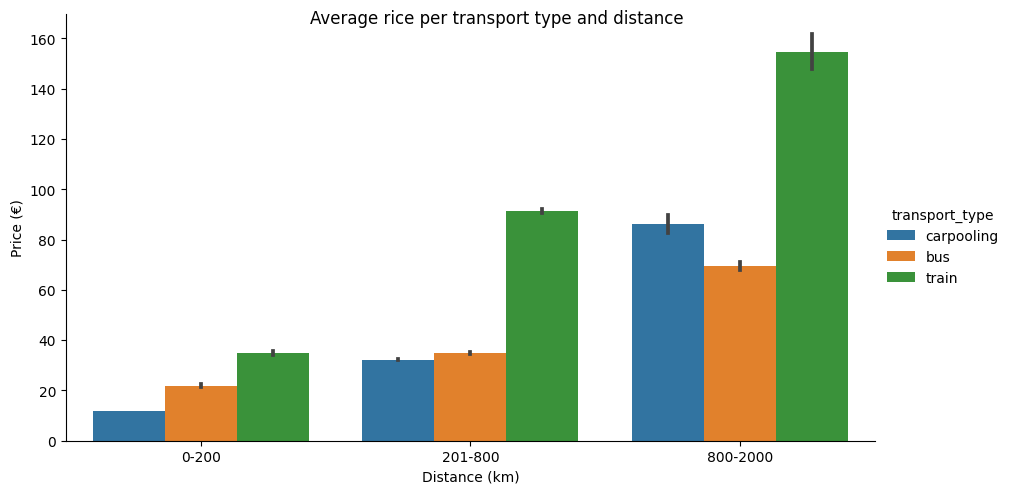

In [30]:
g = sns.catplot(x="distance_range", y="price_in_euros", hue="transport_type",
                kind="bar", data=time_type_price,aspect=1.8, order=names[:-1])
g.fig.suptitle('Average rice per transport type and distance')
plt.xlabel('Distance (km)')
plt.ylabel('Price (€)')

We observe that train is always more expensive and above 800 km, carpooling is more expensive than bus

Text(37.63712432484569, 0.5, 'Time (hours)')

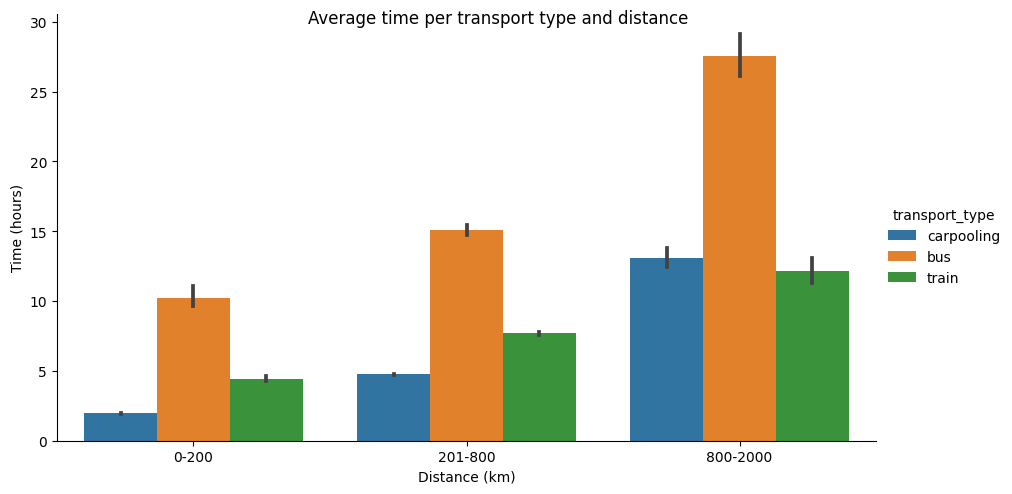

In [31]:
time_type_price["duration_in_hours"] = time_type_price["duration"].dt.total_seconds()/3600
g = sns.catplot(x="distance_range", y="duration_in_hours", hue="transport_type",
                kind="bar", data=time_type_price,aspect=1.8, order=names[:-1])
g.fig.suptitle('Average time per transport type and distance')
plt.xlabel('Distance (km)')
plt.ylabel('Time (hours)')

Without surprise, bus is always the slowest. With surprise train is slower than carpooling. One hypothesis to explain is train can have be regular or TGV and have many stops which is not the case for carpooling

Other insightful could be drawn from this data such as the price difference between companies, impact of time of reservation before departure, etc

## Ride recommendation

The utility data when choosing a transport is the time between depart and arrival, the number of middle stations, the price per kilometer, the utility options of the transport (Wi-Fi etc). The CO2 emitted would also be great but we haven't the later so let's recommand ride based on the others features. 
We create a dataframe with this features and preprocess them to have numerical value instead of string, boolean, etc

In [32]:
price_df.columns

Index(['id', 'o_station_id', 'd_station_id', 'departure_ts', 'arrival_ts',
       'price_in_euros', 'search_ts', 'middle_stations', 'other_companies',
       'o_city_id', 'd_city_id', 'duration', 'o_city_name', 'o_country',
       'd_city_name', 'd_country', 'o_station_name', 'd_station_name',
       'company_id', 'provider_id', 'name', 'fullname', 'has_wifi', 'has_plug',
       'has_adjustable_seats', 'has_bicycle', 'transport_type'],
      dtype='object')

In [33]:
#Encodage des variabeles categoriques avec LabelEncdoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

recommend = price_df[["company_id","o_station_id", "d_station_id", "price_in_euros",
                      "middle_stations", "o_city_id", "d_city_id", "duration",
                     'has_wifi', 'has_plug', 'has_adjustable_seats', 'has_bicycle','transport_type']]
recommend.loc[:,'has_wifi'] = le.fit_transform(recommend['has_wifi'])
recommend.loc[:,'has_plug'] = le.fit_transform(recommend['has_plug'])
recommend.loc[:,'has_adjustable_seats'] = le.fit_transform(recommend['has_adjustable_seats'])
recommend.loc[:,'has_bicycle'] = le.fit_transform(recommend['has_bicycle'])
recommend.loc[:,'transport_type'] = le.fit_transform(recommend['transport_type'])
recommend.loc[:,"duration"] = recommend["duration"].dt.total_seconds()
recommend["nb_translation"] = recommend.middle_stations.apply(lambda s : 0 if str(s)=="nan" else len(str(s).split(",")))
recommend=recommend.drop("middle_stations", axis=1)
recommend.head()

C:\Users\adrie\AppData\Local\Temp\ipykernel_18740\3918522674.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommend.loc[:,'has_wifi'] = le.fit_transform(recommend['has_wifi'])
C:\Users\adrie\AppData\Local\Temp\ipykernel_18740\3918522674.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommend.loc[:,'has_plug'] = le.fit_transform(recommend['has_plug'])
C:\Users\adrie\AppData\Local\Temp\ipykernel_18740\3918522674.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,company_id,o_station_id,d_station_id,price_in_euros,o_city_id,d_city_id,duration,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type,nb_translation
0,11,0.0,0.0,45.5,611,542,22200.0,0,0,0,0,1,0
1,11,0.0,0.0,18.0,628,453,10800.0,0,0,0,0,1,0
2,11,0.0,0.0,21.5,628,453,9000.0,0,0,0,0,1,0
3,11,0.0,0.0,17.0,628,453,9000.0,0,0,0,0,1,0
4,11,0.0,0.0,17.0,628,453,10200.0,0,0,0,0,1,0


In [34]:
#merge to get the latitute and longitude departure city
recommend = pd.merge(recommend,cities_df[["id","latitude","longitude"]], 
                           left_on="d_city_id", right_on="id",suffixes=(None,"_d"))
recommend.drop(["id"], axis=1,inplace=True)
recommend.rename(columns={"latitude":"d_latitude_city","longitude" : "d_longitude_city"} ,inplace=True)

#merge to get the latitute and longitude city
recommend = pd.merge(recommend,cities_df[["id","latitude","longitude"]], 
                           left_on="o_city_id", right_on="id", suffixes=(None,"_o"))
recommend.drop(["id"], axis=1,inplace=True)
recommend.rename(columns={"latitude":"o_latitude_city","longitude" : "o_longitude_city"} ,inplace=True)
recommend.head()

#merge to get the latitute and longitude departure city
recommend = pd.merge(recommend,stations_df[["id","latitude","longitude"]], 
                           left_on="d_station_id", right_on="id",suffixes=(None,"_d"), how="left")
recommend.drop(["id"], axis=1,inplace=True)
recommend.rename(columns={"latitude":"d_latitude_station","longitude" : "d_longitude_station"} ,inplace=True)

#merge to get the latitute and longitude city
recommend = pd.merge(recommend,stations_df[["id","latitude","longitude"]], 
                           left_on="o_station_id", right_on="id", suffixes=(None,"_o"), how="left")
recommend.drop(["id"], axis=1,inplace=True)
recommend.rename(columns={"latitude":"o_latitude_station","longitude" : "o_longitude_station"} ,inplace=True)
recommend.head()


,company_id,o_station_id,d_station_id,price_in_euros,o_city_id,d_city_id,duration,has_wifi,has_plug,has_adjustable_seats,...,transport_type,nb_translation,d_latitude_city,d_longitude_city,o_latitude_city,o_longitude_city,d_latitude_station,d_longitude_station,o_latitude_station,o_longitude_station
0,11,0.0,0.0,45.5,611,542,22200.0,0,0,0,...,1,0,43.604452,3.918318,47.907018,1.90627,NaN,NaN,NaN,NaN
1,1,63.0,1044.0,14.5,611,542,64200.0,1,1,1,...,0,2,43.604452,3.918318,47.907018,1.90627,43.583932,3.860233,47.896911,1.854277
2,10,5905.0,6495.0,74.0,611,542,115020.0,0,0,1,...,2,4,43.604452,3.918318,47.907018,1.90627,43.604900,3.880500,47.926740,1.906740
3,10,5905.0,6495.0,135.0,611,542,77700.0,0,0,1,...,2,4,43.604452,3.918318,47.907018,1.90627,43.604900,3.880500,47.926740,1.906740
4,10,5905.0,6495.0,77.1,611,542,78360.0,0,0,1,...,2,2,43.604452,3.918318,47.907018,1.90627,43.604900,3.880500,47.926740,1.906740


In [35]:
recommend["distance_station"]=haversine_distance(recommend["d_latitude_station"],
                                                 recommend["d_longitude_station"], 
                                                 recommend["o_latitude_station"],
                                                 recommend["o_longitude_station"])
recommend["distance_city"]=haversine_distance(recommend["d_latitude_city"],
                                                 recommend["d_longitude_city"], 
                                                 recommend["o_latitude_city"],
                                                 recommend["o_longitude_city"])
recommend["distance"] = recommend.apply(lambda row: row["distance_city"] if row["o_station_id"]==0 else row["distance_station"], axis=1)
recommend.head()

,company_id,o_station_id,d_station_id,price_in_euros,o_city_id,d_city_id,duration,has_wifi,has_plug,has_adjustable_seats,...,d_longitude_city,o_latitude_city,o_longitude_city,d_latitude_station,d_longitude_station,o_latitude_station,o_longitude_station,distance_station,distance_city,distance
0,11,0.0,0.0,45.5,611,542,22200.0,0,0,0,...,3.918318,47.907018,1.90627,NaN,NaN,NaN,NaN,NaN,503.2,503.20
1,1,63.0,1044.0,14.5,611,542,64200.0,1,1,1,...,3.918318,47.907018,1.90627,43.583932,3.860233,47.896911,1.854277,504.17,503.2,504.17
2,10,5905.0,6495.0,74.0,611,542,115020.0,0,0,1,...,3.918318,47.907018,1.90627,43.604900,3.880500,47.926740,1.906740,504.32,503.2,504.32
3,10,5905.0,6495.0,135.0,611,542,77700.0,0,0,1,...,3.918318,47.907018,1.90627,43.604900,3.880500,47.926740,1.906740,504.32,503.2,504.32
4,10,5905.0,6495.0,77.1,611,542,78360.0,0,0,1,...,3.918318,47.907018,1.90627,43.604900,3.880500,47.926740,1.906740,504.32,503.2,504.32


We set the NaN value of o_station_id and d_station_id to 0 which is not used by other station

In [36]:
recommend.drop(["o_station_id", "d_station_id", "o_city_id","d_city_id",
                "d_longitude_city","o_latitude_city","o_longitude_city",
                "d_latitude_station","d_longitude_station","o_latitude_station",
                "o_longitude_station","distance_station","distance_city"]
               , axis=1,inplace=True)

In [37]:
recommend.head()

,company_id,price_in_euros,duration,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type,nb_translation,d_latitude_city,distance
0,11,45.5,22200.0,0,0,0,0,1,0,43.604452,503.20
1,1,14.5,64200.0,1,1,1,0,0,2,43.604452,504.17
2,10,74.0,115020.0,0,0,1,0,2,4,43.604452,504.32
3,10,135.0,77700.0,0,0,1,0,2,4,43.604452,504.32
4,10,77.1,78360.0,0,0,1,0,2,2,43.604452,504.32


In [38]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

X= recommend.drop(columns="price_in_euros")
Y= recommend.price_in_euros
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20, random_state=42)
regressors = [LinearRegression(), DecisionTreeRegressor(), 
              RandomForestRegressor(n_estimators=400, n_jobs=-1)]

# Perform cross-validation and evaluation for each regression algorithm
for regressor in regressors:
    cv_scores = cross_val_score(regressor, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_cv = -cv_scores.mean()

    regressor.fit(x_train, y_train)
    
    y_pred = regressor.predict(x_test)
    
    mse_test = mean_squared_error(y_test, y_pred)
    mae_test = mean_absolute_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)
    
    print(f"Regressor: {regressor.__class__.__name__}")
    print(f"Mean Squared Error (CV): {mse_cv:.2f}")
    print(f"Mean Squared Error (Test): {mse_test:.2f}")
    print(f"Mean Absolute Error (Test): {mae_test:.2f}")
    print(f"R-squared (Test): {r2_test:.2f}\n")

Regressor: LinearRegression
Mean Squared Error (CV): 460.24
Mean Squared Error (Test): 443.45
Mean Absolute Error (Test): 11.37
R-squared (Test): 0.68

Regressor: DecisionTreeRegressor
Mean Squared Error (CV): 128.83
Mean Squared Error (Test): 120.20
Mean Absolute Error (Test): 4.64
R-squared (Test): 0.91

Regressor: RandomForestRegressor
Mean Squared Error (CV): 93.77
Mean Squared Error (Test): 88.70
Mean Absolute Error (Test): 4.45
R-squared (Test): 0.94



The random forest regressor seem to be better. The R-squared value of 0.94 implies a strong relationship between the features and the target
